# PISA 2012 Data Exploration: language type and mathematics skills (through performance)
## by Anna Pedroni

### The question:

## Does the type of writing system of a language have an influence on the performance in the mathematics tests?


#### The language types, classified by writing system, are:
- languages with a **shallow orthography**, i.e. alphabetic, with a highly phonemic orthography 
- languages with a **deep orthography**, i.e. alphabetic, with a more complex relationship between orthography and pronunciation
- **logographic** languages, i.e. written with ideograms


## PISA Dataset Overview

- is an age-based survey, assessing 15-year-old;
- focuses on the **extent to which students can apply the knowledge and skills they have learned and practised** at school;
- collects information from students on various aspects of their home, family and school background

##### in 2012:
- test were administered in the language of instruction of mathematics, the main topic that year
- 65 countries/economies completed the paper-based tests

### The main variables that has been explored:
- Mathematics test scores, _in PISA scores. To simplify: 0 (min) to 1000 (max)_
  
- Index of economic, social and cultural status (ESCS), _PISA scale range: -5.32 (min) to 3.12 (max)_ 
- Language of the test
- Country

### Moreover, I regrouped the languages I selected on the basis of their writing systems, deriving a new variable:
- **Language type**:
  - *shallow orthography*: Spanish, Finnish, Italian, German
  - *deep orthography*: English, French, Arabic
  - *logographic*: Chinese, Japanese, Korean, Shanghai dialect, Mandarin, Cantonese

NB: I selected only data relative to students that, at home, speak the same language they took the test in.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_slideshow1.csv')

# convert last three columns to category

# math
values_math = ['Below 1', '1', '2', '3', '4', '5', '6']
ordered_math = pd.api.types.CategoricalDtype(ordered=True, categories=values_math)
df['Plausible_level_math'] = df['Plausible_level_math'].astype(ordered_math)

# reading
values_reading = ['Too low', '1b', '1a', '2', '3', '4', '5', '6']
ordered_reading = pd.api.types.CategoricalDtype(ordered=True, categories=values_reading)
df['Plausible_level_reading'] = df['Plausible_level_reading'].astype(ordered_reading)

# ESCS levels
ESCS_bands = ['-5.32 to -4.38', '-4.38 to -3.44', '-3.44 to -2.51',
              '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31',
              '0.31 to 1.24', '1.24 to 2.18', '2.18 to 3.12']
ESCS_bands_order = pd.api.types.CategoricalDtype(ordered=True, categories=ESCS_bands)
df.ESCS_levels = df.ESCS_levels.astype(ESCS_bands_order)


### Plotting the distribution of the results of the mathematics tests by the language type, we actually see a difference

- The logographic group has the highest mean (564).
- The deep orthography language group and the shallow orthography group have a mean very similar between them (around 500. Their standard deviation differs slightly), and lower of the logographic group one.

#### It appears that the students using a logographic language perform better.

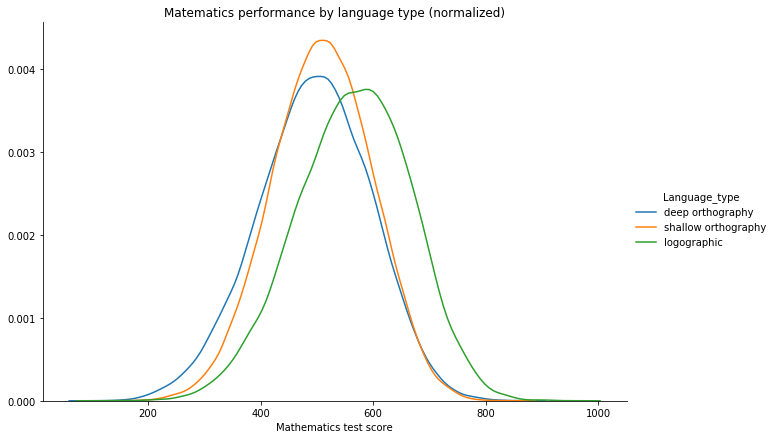

In [24]:
# math values by language type (normalized)
g = sb.FacetGrid(data=df, hue='Language_type', height=6, aspect=1.5)
g.map(sb.distplot, 'Plausible_value_in_mathematics',  hist=False, bins=120);
g.add_legend();
plt.title('Matematics performance by language type (normalized)')
plt.xlabel('Mathematics test score');


## Mathematics performance and index of economic, social and cultural status (ESCS) - 1

##### The index of economic, social and cultural status has a positive correlation with the math test results.

The relationship could be described as _"better socioeconomic and cultural background allows for any math competence level, while worse ESCS background hinders top achievements in mathematics"._



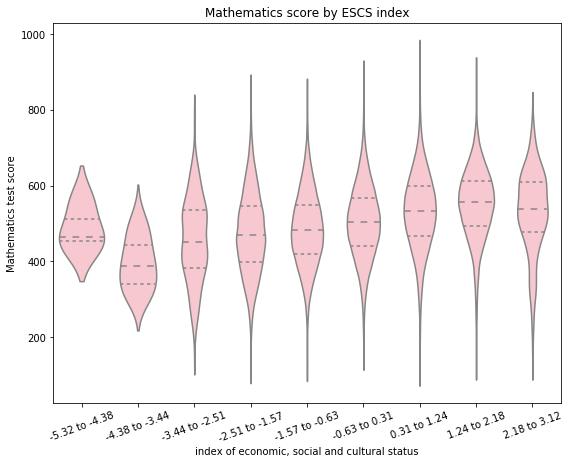

In [25]:
# math values by ESCS level
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sb.violinplot(data=df, x='ESCS_levels', y='Plausible_value_in_mathematics', color='pink', inner='quartile');
plt.xticks(rotation=20);
plt.title('Mathematics score by ESCS index');
plt.xlabel('index of economic, social and cultural status');
plt.ylabel('Mathematics test score');



## Mathematics performance and index of economic, social and cultural status (ESCS) - 2

As seen, mathematics performance and ESCS index are positively correlated.
#### However, ESCS index cannot be the only factor explaining mathematics performance.

In fact, if we plot mathematics scores by ESCS index, dividing the three linguistic types, we still see the correlation, but we have no hint about why the logographic group line is placed significately above the other two.\*


#### There must be some other factor that places the logografic group higher, and we could think that the language type is indeed relevant...

\* The two lowest ESCS levels and the top one are not plotted, because they have few datapoints (e.g. 1, 7, or 13) 

In [26]:
# drop the lines in the two lowest ESCS levels and in the top one
ESCS_drop = ['-5.32 to -4.38', '-4.38 to -3.44', '2.18 to 3.12']
df_middleESCS = df.drop(df[df.ESCS_levels.isin(ESCS_drop)].index)
# Modify the category
ESCS_ordered2 = ['-3.44 to -2.51', '-2.51 to -1.57', '-1.57 to -0.63', '-0.63 to 0.31', '0.31 to 1.24', '1.24 to 2.18']
ESCS_middle_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ESCS_ordered2)
df_middleESCS.ESCS_levels = df_middleESCS.ESCS_levels.astype(ESCS_middle_cat)

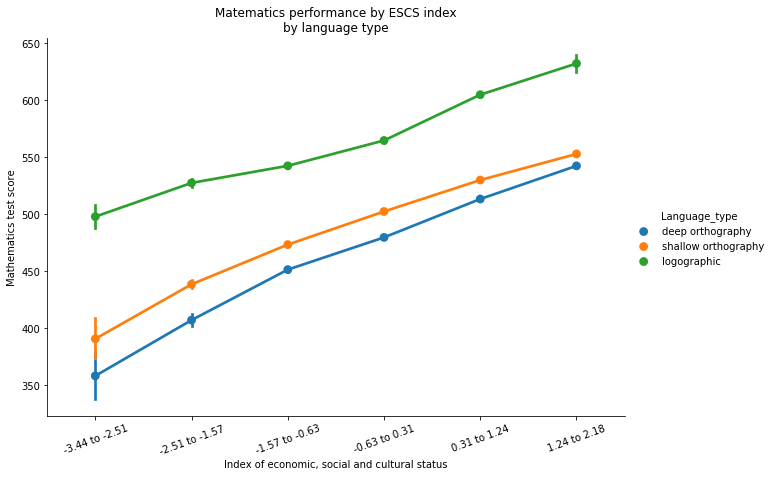

In [27]:
# relationship between ESCS and math values by language type
sb.catplot(data=df_middleESCS, x='ESCS_levels', y='Plausible_value_in_mathematics',
           hue='Language_type', kind='point', height=6, aspect=1.5);
plt.title('Matematics performance by ESCS index\nby language type')
plt.xlabel('Index of economic, social and cultural status');
plt.ylabel('Mathematics test score');
plt.xticks(rotation=20);

#### ...also because, in general, logographic group students that perform overall better in math test, generally live in lower ESCS conditions than the students of the other two groups.

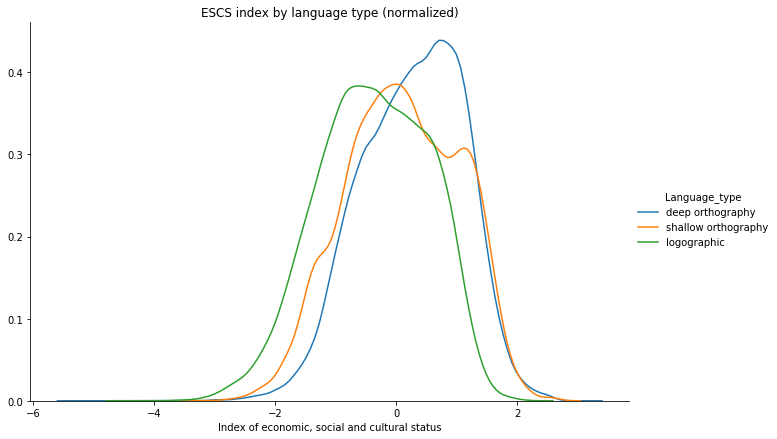

In [28]:
# ESCS by language type
g = sb.FacetGrid(data=df, hue='Language_type', height=6, aspect=1.5)
g.map(sb.distplot, 'Index_of_economic_social_and_cultural_status', hist=False, bins=120);
g.add_legend();
plt.title('ESCS index by language type (normalized)')
plt.xlabel('Index of economic, social and cultural status');



#### We have one language that is used in many countries. We can try and use it to test if the language type is the variable that can facilitate or hinder good mathematics performances. 

## English: one language, but different mathematics test results


- Below the mathematics scores by ESCS level are plotted for the different English speaking countries.
- For comparison the same graphic is provided for the logographic languages

In [29]:
# get the subset of english speaking Countries
english_df = df_middleESCS.query('Language_of_the_test=="English"')

# select Countries with more than 700 rows
english_count = english_df.Country.value_counts().to_dict().items()

english_df = english_df[english_df.Country.isin([key for key, val in english_count if val > 700])]



In [30]:
# collect the logographic countries
logographic_df = df_middleESCS.query('Language_type=="logographic"')


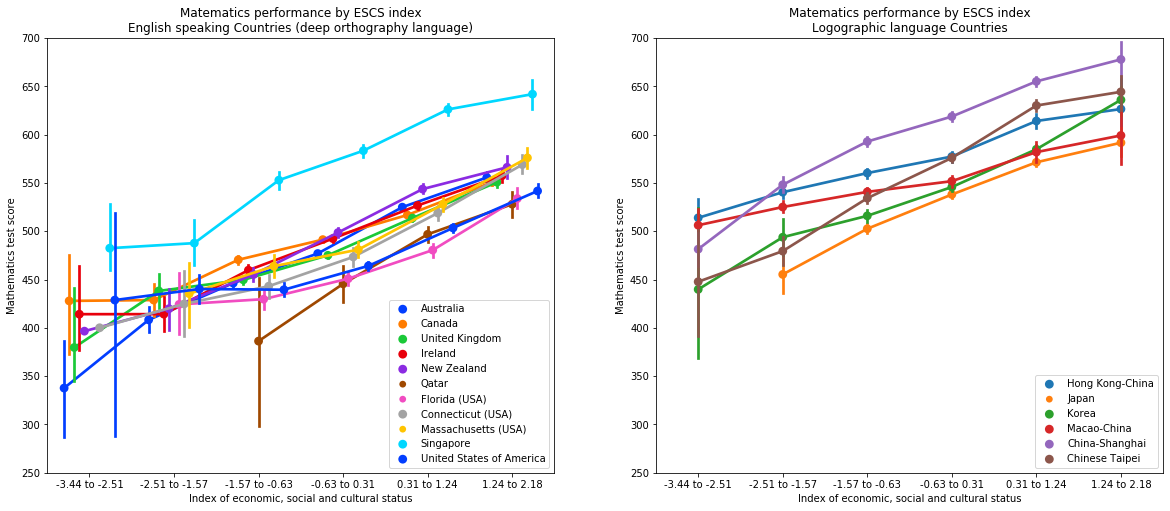

In [31]:
# plot the math scores by Country divided by ESCS level (English speaking countries)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sb.pointplot(data=english_df, x="ESCS_levels", y="Plausible_value_in_mathematics",
                 hue="Country", dodge=.6, palette='bright');
plt.ylim(250,700)
plt.legend(loc=4)
plt.title('Matematics performance by ESCS index\nEnglish speaking Countries (deep orthography language)')
plt.xlabel('Index of economic, social and cultural status');
plt.ylabel('Mathematics test score');


# plot the math scores by logographic languages (=Countries) divided byESCS (logographic)
plt.subplot(1,2,2)
sb.pointplot(data=logographic_df, x="ESCS_levels", y="Plausible_value_in_mathematics", hue="Country");
plt.ylim(250,700)
plt.legend(loc=4);
plt.title('Matematics performance by ESCS index\nLogographic language Countries')
plt.xlabel('Index of economic, social and cultural status');
plt.ylabel('Mathematics test score');

### Singapore English speaker show us thet their performance is as good as the top logographic language group ones.

- Singapore, within the English speaking subset, is the only asian Country 
- within the logographic languages group (all asian Countries) there is variability as well

#### This suggests that the language type (deep or shallow orthography, or logographic) is not the explanatory variable for good or bad performance in mathematic tests, with the ESCS level being equal. 
     
_NB: Singapore is a highly multilingual society, however the other two main languages, Tamil and Malay, have an alphabetic writing system as well._

The question: Does the type of writing system of a language have an influence on the performance in the mathematics tests?

### The answer:

## No, it is not the language the main reason different language type groups have different performance in mathematics tests.

##### In the end.. 

### More digging is needed, and I would start from the differences among educational systems and cultural backrounds.

In [ ]:
!jupyter nbconvert "slide_deck_pedroni.ipynb" --to slides --post serve --template output_toggle